In [20]:
import xarray as xr
import numpy as np
import scipy 
from scipy import signal
import matplotlib.pyplot as plt

In [13]:
inm_ds = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/INM/INM-CM4-8/historical/r1i1p1f1/Amon/ts/gr1.5/v20190530/ts_Amon_INM-CM4-8_historical_r1i1p1f1_gr1.5_185001-201412.nc')

In [14]:
inm_ts = inm_ds.ts
inm_dt = np.apply_along_axis(scipy.signal.detrend, 0, inm_ts)

In [16]:
inm = xr.DataArray(inm_dt, coords=inm_ts.coords, attrs=inm_ts.attrs)

In [19]:
#un-normalised nino34 timeseries
nino_region = inm.sel(lat=slice(-5,5), lon=slice(190,240))
std = nino_region.std()
clim = nino_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
anom = (nino_region - clim).mean(dim=['lat', 'lon'])

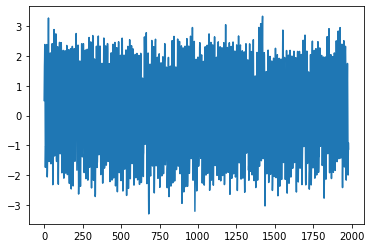

In [21]:
plt.plot(anom)

In [22]:
std

<xarray.DataArray ()>
array(1.71272039)

In [23]:
norm = anom/std

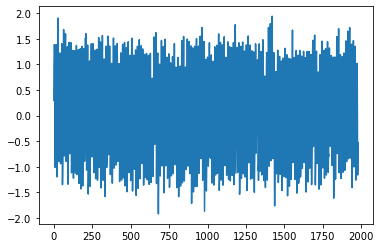

In [25]:
plt.plot(norm)

In [27]:
np.std(anom)

<xarray.DataArray ()>
array(1.52368057)

In [28]:
np.std(norm)

<xarray.DataArray ()>
array(0.88962606)

In [29]:
norm.groupby('time.month').std()

<xarray.DataArray (month: 12)>
array([0.34161317, 0.28005342, 0.24945208, 0.2221994 , 0.21468243,
       0.23314871, 0.27094321, 0.2678102 , 0.23925165, 0.23514678,
       0.23994015, 0.29297984])
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [30]:
norm.groupby('time.season').std()

<xarray.DataArray (season: 4)>
array([0.51310952, 0.76293788, 0.29991189, 0.31326695])
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

### Repeat for ACCESS

In [32]:
!ls /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/ts/gr1.5/v20190919/

ts_Amon_ACCESS-CM2_historical_r1i1p1f1_gr1.5_185001-201412.nc


In [33]:
access_ds = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/ts/gr1.5/v20190919/ts_Amon_ACCESS-CM2_historical_r1i1p1f1_gr1.5_185001-201412.nc')

In [34]:
access_ts = access_ds.ts
access_dt = np.apply_along_axis(scipy.signal.detrend, 0, access_ts)

In [35]:
access = xr.DataArray(access_dt, coords=access_ts.coords, attrs=access_ts.attrs)

In [36]:
#un-normalised nino34 timeseries
nino_region = access.sel(lat=slice(-5,5), lon=slice(190,240))
std = nino_region.std()
clim = nino_region.sel(time=slice('1950-01', '1979-12')).mean(dim='time')
anom = (nino_region - clim).mean(dim=['lat', 'lon'])

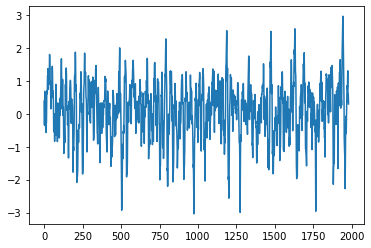

In [37]:
plt.plot(anom)